<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تمرین کراس
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم به بهانه‌ی حل مسئله‌ی تشخیص سرطان سینه به کمک یک شبکه‌ی عصبی عمیق، نحوه‌ی کار با <code>keras</code> را تمرین کنیم.
مجموعه‌داده‌ی این تمرین در ارتباط با ویژگی‌های استخراج شده از توده‌های سرطانی موجود در سینه‌ی چند بیمار بوده است. برخی ویژگی‌ها از تصاویر دیجیتالی به دست آمده‌اند که خصوصیات هسته‌های سلولی موجود در تصویرهای مذکور را توصیف می‌کنند. هدف این تمرین ساخت یک مدل یادگیری عمیق برای تشخیص خوش‌خیم یا بدخیم بودن سرطان افراد بر اساس ویژگی‌های فوق است.
</font>
</p>


In [1]:
import pandas as pd
import numpy as np

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌ای که در اختیار شما قرار گرفته به‌ازای هر داده‌ای که ثبت شده نوع سرطان آن در ستون <code>diagnosis</code> نوشته شده است. دو وضعیت موجود در این ستون عبارتند از:

</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| مقدار | نوع سرطان |
| :---: | :---: |
| <code>M</code> | بدخیم |
| <code>B</code> | خوش‌خیم |

</font>
</p>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا داده‌ها را از فایل <code>data</code> موجود در پوشه بخوانید.
سپس باید ستون (<code>Unnamed: 32</code>) را حذف کنید. همچنین می‌توانید ستون <code>id</code> را نیز حذف کنید.
</font>
</p>


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/2_keras.zip (Unzipped Files)/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# To-Do (Drop columns)
df =df.drop(['Unnamed: 32'], axis=1)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اولین قدم پیشنهاد می‌کنیم کمی به بررسی دقیق‌تر و آماری داده‌هایی که در دسترس‌تان است بپردازید و در صورت علاقه نمودارهایی را جهت بررسی توزیع‌های داده رسم کنید. به‌عنوان مثال بررسی این‌که کدام ویژگی‌ها همبستگی بیشتری با نتیجه/هدف/برچسب دارند و این‌که آیا داده‌ها از منظر ستون هدف/برچسب متوازن است و مانند آن.
حداقل چهار گزارش از داده‌های موجود ارائه دهید.
نیازی به گزارش‌های پیچیده نیست و اگر کمک به فهم بهتر از داده‌ها کند مورد قبول است.
</font>
</p>

In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

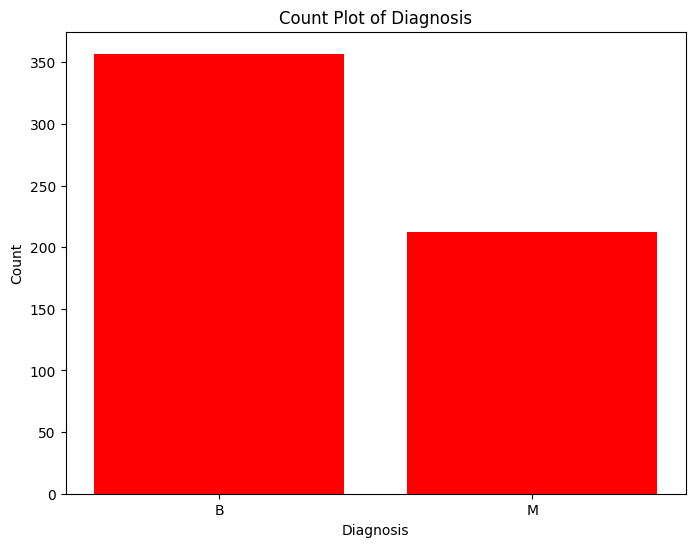

In [10]:
import matplotlib.pyplot as plt
diagnosis_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts , color='red')
plt.title('Count Plot of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

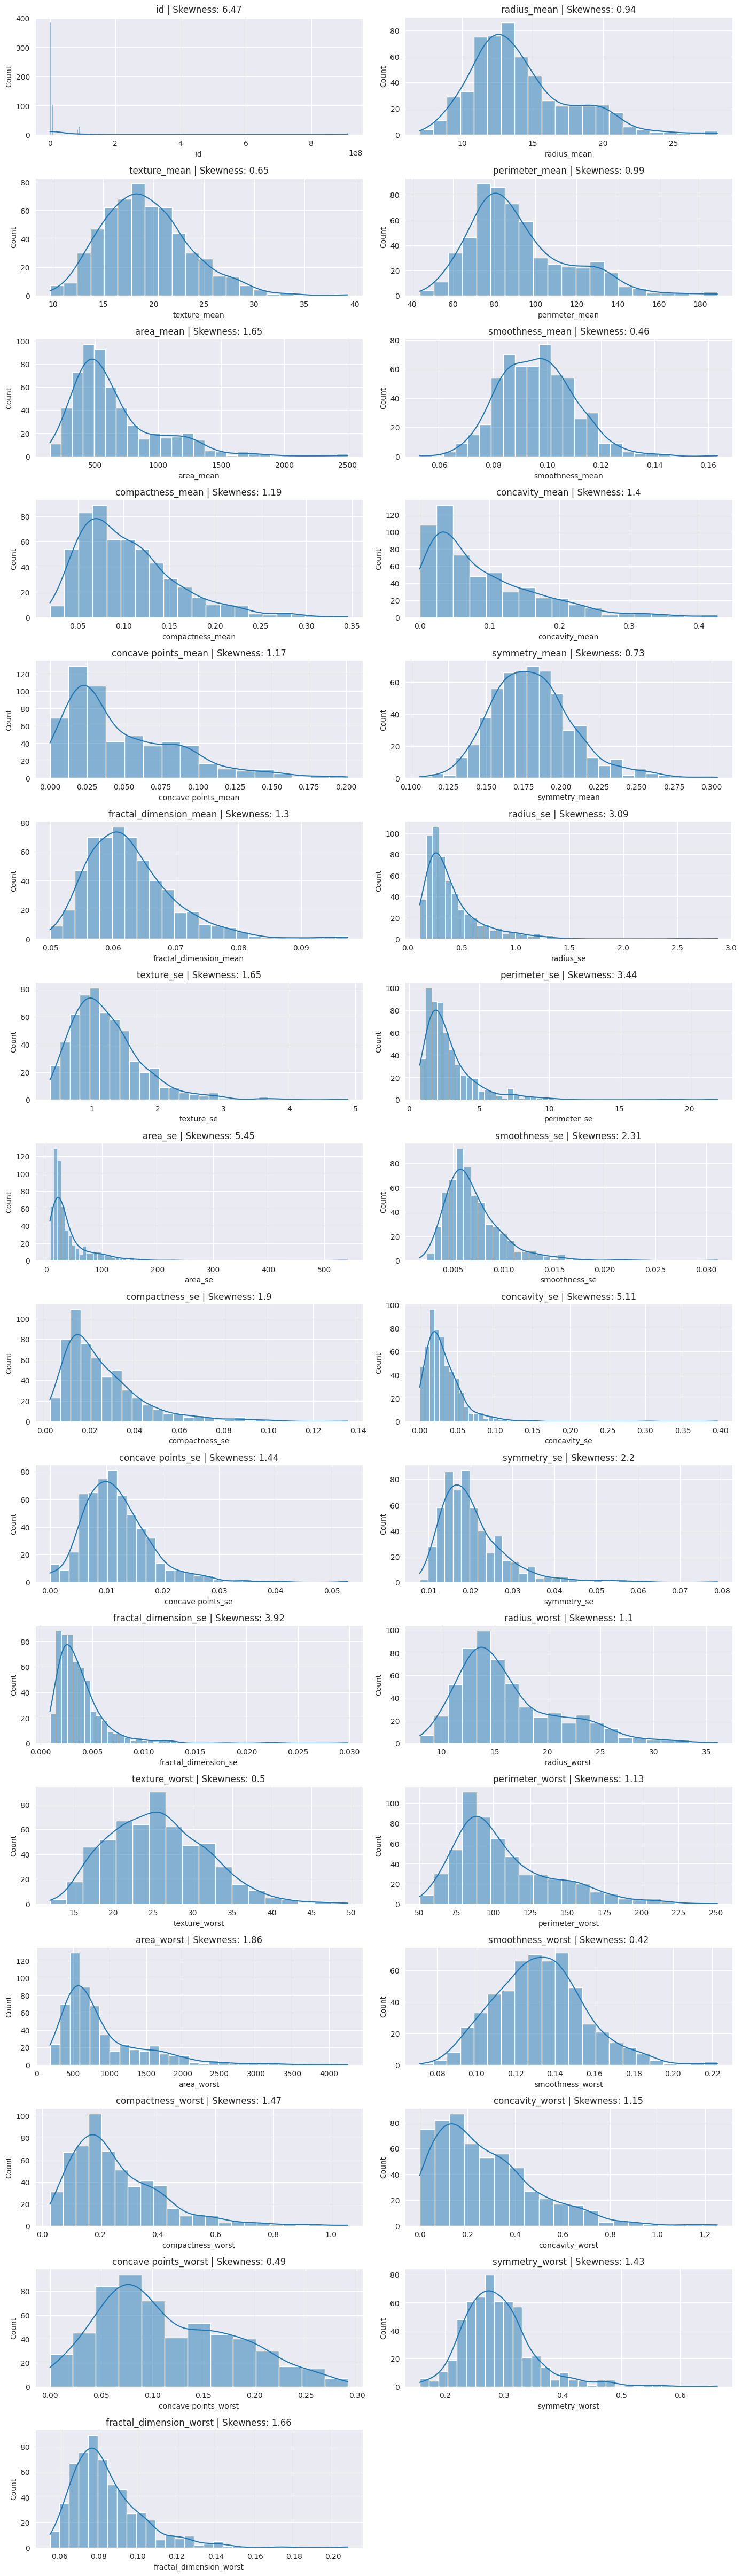

In [11]:
import seaborn as sns
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌پردازش داده‌ها</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به سراغ آماده‌سازی داده‌ها برای مدل‌سازی برویم..
<br>
داده‌ها را به دو مجموعه‌ی آموزشی (<code>train</code>) و آزمون (<code>test</code>) جدا کنید. بدین منظور ۲۰ درصد داده‌ها را برای آزمون در نظر بگیرید و <code>random_state=42</code> قرار دهید. در صورت تمایل می‌توانید بخشی از مجموعه‌ی آموزشی را جدا کرده و برای اعتبارسنجی (<code>validation</code>) استفاده کنید.
هم‌چنین داده‌های دسته‌ای (categorical) را کذگذاری (encode) کنید.
<br>
تصمیم‌گیری استفاده از تکنیک‌های دیگر همچون نرمال‌سازی بر عهده‌ی خودتان است.
</font>
</p>

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded =df.copy()
for col in df_encoded.columns:
  if df_encoded[col].dtype == 'object':
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [13]:
df_encoded= df_encoded.drop(['id'], axis=1)
df_encoded.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
X = df_encoded.iloc[:, 1:31]
y = df_encoded[['diagnosis']]

In [16]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42,
                                   test_size=0.2,
                                   shuffle=True)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (455, 30)
X_test shape:  (114, 30)
y_train shape:  (455, 1)
y_test shape:  (114, 1)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌توانید با استفاده از الگوریتم‌های یادگیری عمیق مدلی آموزش دهید که بر اساس مقادیر ویژگی‌های موجود، نوع سرطان را پیش‌بینی کند.
در این قسمت از شما می‌خواهیم به دو صورت <code>Sequential</code> و <code>Functional</code> مدلی طراحی کنید و آن‌ها را با هم قیاس کنید تا با تفاوت روش‌های مختلف ساخت مدل در کراس آشنا شوید.
برای مطالعه و مشاهده‌ی بیشتر تفاوت این دو نوع مدل به <a href="https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10">این لینک</a>  یا <a href="https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/">این لینک</a> می‌توانید نگاه کنید.
<br>
 تابع هزینه (<code>loss</code>) و بهینه‌ساز (<code>optimizer</code>) را براساس تشخیص خود، انتخاب کنید.
    
</font>
</p>

In [21]:
import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dropout, Dense, Input, concatenate
from tensorflow.keras.regularizers import L2
from keras import initializers
from tensorflow.keras.initializers import glorot_uniform
import tensorflow as tf

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
مدل‌سازی <code>Sequential</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت نیاز است به کمک روش <code>Sequential</code> مدل زیر را پیاده کنید. در صورتی‌که قصد بررسی ساختار مدل خود و ترسیم شکلی همچون شکل زیر دارید می‌توانید از تابع <code>keras.utils.plot_model</code> کمک بگیرید (برای اطلاعات بیشتر <a href="https://keras.io/api/utils/model_plotting_utils/">این لینک</a> را مطالعه کنید).
<br>
تعداد نورون‌های هر لایه و تابع فعال‌ساز آن در شکل قابل مشاهده است. سایر اطلاعات مورد نیاز عبارتند از:
<ul dir=rtl>
<li>
لایه‌های <code>Dense_2</code>، <code>Dense_4</code> و <code>Output</code> با روش <code>GlorotNormal</code> مقداردهی اولیه شوند.
</li>
<li>
لایه‌های <code>Dense_3</code> و <code>Dense_3</code> با روش <code>HeNormal</code> مقداردهی اولیه شوند.
</li>
<li>
احتمال Dropout را در <code>Dropout_1</code> و <code>Dropout_2</code> برابر <code>0.2</code> قرار دهید.
</li>
<li>
احتمال Dropout را در <code>Dropout_3</code>، <code>Dropout_4</code> و <code>Dropout_5</code> برابر <code>0.3</code> قرار دهید.
</li>
<li>
برای لایه‌های <code>Dense_2</code> تا <code>Dense_5</code> و همچنین لایه‌ی <code>Output</code> از رگولاریزیشن <code>L2</code> استفاده کنید و مقدار ضریب آن را <code>0.02</code> قرار دهید.
</ul>
    
</font>
</p>

<center>
<div style="max-width:600px">
<img src="sequential_model.png" >
</div>
</center>

In [22]:
from keras.regularizers import l2

In [23]:
X_train.shape[0]

455

In [24]:
initializer = tf.keras.initializers.GlorotNormal(seed = 1234)
initializer_h = tf.keras.initializers.HeNormal(seed = 1234)

In [68]:
model = Sequential()
dropout_1_2 = 0.2
dropout_3_4_5 = 0.3
regularizer_l2=0.02
# model.add(keras.layers.Input(shape=(30,)), name="input")
model.add(Input(shape=(X_train.shape[1],), name="Dense_1_input"))
model.add(layers.Dense(40, activation="relu",name="Dense_1",kernel_initializer=initializer_h))
model.add(Dropout(dropout_1_2,input_dim=40,name="Dropout_1"))
model.add(layers.Dense(30, activation="relu",name="Dense_2",kernel_initializer=initializer, kernel_regularizer=l2(regularizer_l2)))
model.add(Dropout(dropout_3_4_5,input_dim=30,name="Dropout_2"))
model.add(layers.Dense(15, activation="relu",name="Dense_3",kernel_initializer=initializer_h, kernel_regularizer=l2(regularizer_l2)))
model.add(Dropout(dropout_3_4_5,input_dim=30,name="Dropout_3"))
model.add(layers.Dense(10, activation="relu",name="Dense_4",kernel_initializer=initializer, kernel_regularizer=l2(regularizer_l2)))
model.add(Dropout(dropout_3_4_5,input_dim=10,name="Dropout_4"))
model.add(layers.Dense(5, activation="relu",name="Dense_5", kernel_regularizer=l2(regularizer_l2)))
model.add(Dropout(dropout_3_4_5,input_dim=5,name="Dropout_5"))
model.add(Dense(1, activation='sigmoid',name="Output",kernel_initializer=initializer, kernel_regularizer=l2(regularizer_l2)))
model.compile( loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 40)                1240      
                                                                 
 Dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 Dense_2 (Dense)             (None, 30)                1230      
                                                                 
 Dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 Dense_3 (Dense)             (None, 15)                465       
                                                                 
 Dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 Dense_4 (Dense)             (None, 10)               

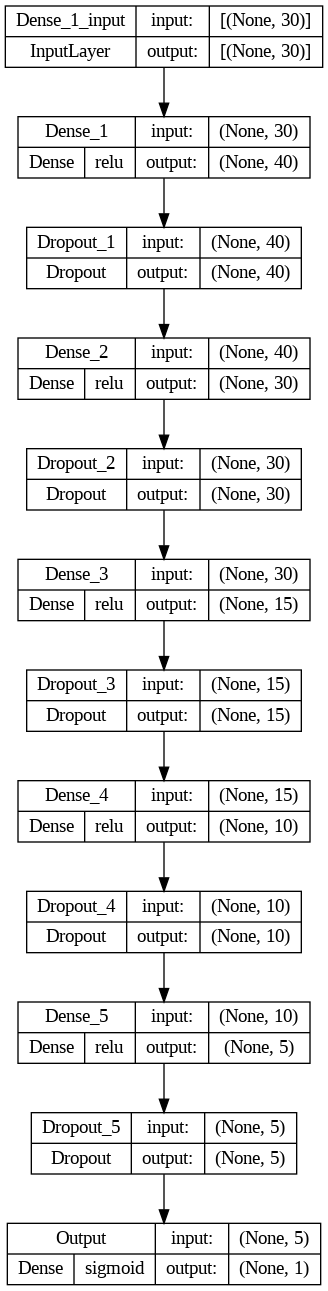

In [69]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, to_file='ans_sequential_model.png')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از ساخت مدل آن را برای ۲۰۰ دور و با اندازه‌ی دسته (batch) معادل ۳۲ آموزش دهید. همچنین بُر زدن (shuffle) داده‌ها را فعال کنید. در صورت علاقه می‌توانید به کمک آرگومان <code>validation_split</code> از بخشی از داده‌های آموزشی برای اعتبارسنجی استفاده کنید (مقدار پیشنهادی <code>0.2</code> است).
<br>
پس از آموزش مدل، مقدار <code>loss</code> و <code>accuracy</code> را برای داده‌های آموزشی و آزمون محاسبه کرده و چاپ کنید.
</font>
</p>

In [70]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=200, shuffle=True)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 2s 25ms/step - loss: 2.5327 - accuracy: 0.5302 - val_loss: 2.4311 - val_accuracy: 0.7363
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 2.3903 - accuracy: 0.5907 - val_loss: 2.3035 - val_accuracy: 0.7363
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 2.3333 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 0s 6ms/step - loss: 2.2742 - accuracy: 0.6209 - val_loss: 2.1818 - val_accuracy: 0.6923
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 2.1557 - accuracy: 0.6374 - val_loss: 2.0617 - val_accuracy: 0.7033
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 2.0447 - accuracy: 0.6401 - val_loss: 1.9411 - val_accuracy: 0.7473
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 1.9643 - accuracy: 0.6181 - val_loss: 1.8251 - val_accuracy: 0.8242
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 1.8366 - accuracy: 0.6923 - val_loss: 1.7171 - val_accuracy: 0.8791
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 1.7619 - accuracy: 0.7527 - val_loss: 1.6054 - val_accuracy: 0.9121
Epoch 9/200
12/12 [==============================] - 0s 7ms/step - loss: 1.6543 - accuracy: 0.7390 - val_loss: 1.5037 - val_accuracy: 0.9231
Epoch 10/200
12/12 [=====

In [71]:
loss, accuracy = model.evaluate(X_train, y_train, verbose = 0) # To-Do (Evaluate the model on train data)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(X_test,y_test, verbose = 0) # To-Do (Evaluate the model on test data)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Train Loss: 0.1788, Train Accuracy: 0.9890
Test Loss: 0.1993, Test Accuracy: 0.9649


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
مدل‌سازی <code>Functional</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مدل‌سازی به این روش دست شما را برای طراحی‌های آزادانه‌تر و پیچیده‌تر باز می ‌گذارد. به‌عنوان مثال می‌توانید شاخه‌های مختلفی در مدل خود ایجاد کنید. در این قسمت مدلی که در تصویر زیر مشاهده می‌کنید را پیاده‌سازی کنید. شاخه‌ی سمت چپ مدل دقیقاْ مشابه با مدل قبلی است ولی شاخه‌ی سمت راست مدل همان ورودی است که با خروجی شاخه‌ی سمت چپ ادغام شده است. برای ادغام از تابع <code>keras.layers.concatenate</code> استفاده کنید.
    
</font>
</p>

<center>
<div style="max-width:600px">
<img src="functional_model.png" >
</div>
</center>

In [72]:
inputs = keras.Input(shape=(30,),name='Input')
hidden_layer_1= Dense(40, activation='relu', name='Dense_1',kernel_initializer=initializer_h)(inputs)
hidden_layer_1 = Dropout(dropout_1_2, name='Dropout_1')(hidden_layer_1)
hidden_layer_2= Dense(30, activation='relu', name='Dense_2',kernel_initializer=initializer, kernel_regularizer=l2(regularizer_l2))(hidden_layer_1)
hidden_layer_2 = Dropout(dropout_1_2,name="Dropout_2")(hidden_layer_2)
hidden_layer_3= Dense(15, activation='relu', name='Dense_3',kernel_initializer=initializer_h, kernel_regularizer=l2(regularizer_l2))(hidden_layer_2)
hidden_layer_3 = Dropout(dropout_3_4_5,name="Dropout_3")(hidden_layer_3)
hidden_layer_4= Dense(10, activation='relu', name='Dense_4',kernel_initializer=initializer, kernel_regularizer=l2(regularizer_l2))(hidden_layer_3)
hidden_layer_4= Dropout(dropout_3_4_5,name="Dropout_4")(hidden_layer_4)
hidden_layer_5= Dense(5, activation='relu', name='Dense_5', kernel_regularizer=l2(regularizer_l2))(hidden_layer_4)
hidden_layer_5= Dropout(dropout_3_4_5,name="Dropout_5")(hidden_layer_5)
y = keras.layers.Concatenate(name='Concatenate')([hidden_layer_5, inputs])
outputs = Dense(1, activation='sigmoid', name='Output',kernel_initializer=initializer, kernel_regularizer=l2(regularizer_l2))(y)
model_functional = keras.Model(inputs=inputs, outputs=outputs)
model_functional .summary()
model_functional.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True) , optimizer='adam', metrics=['accuracy'])

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 30)]                 0         []                            
                                                                                                  
 Dense_1 (Dense)             (None, 40)                   1240      ['Input[0][0]']               
                                                                                                  
 Dropout_1 (Dropout)         (None, 40)                   0         ['Dense_1[0][0]']             
                                                                                                  
 Dense_2 (Dense)             (None, 30)                   1230      ['Dropout_1[0][0]']           
                                                                                            

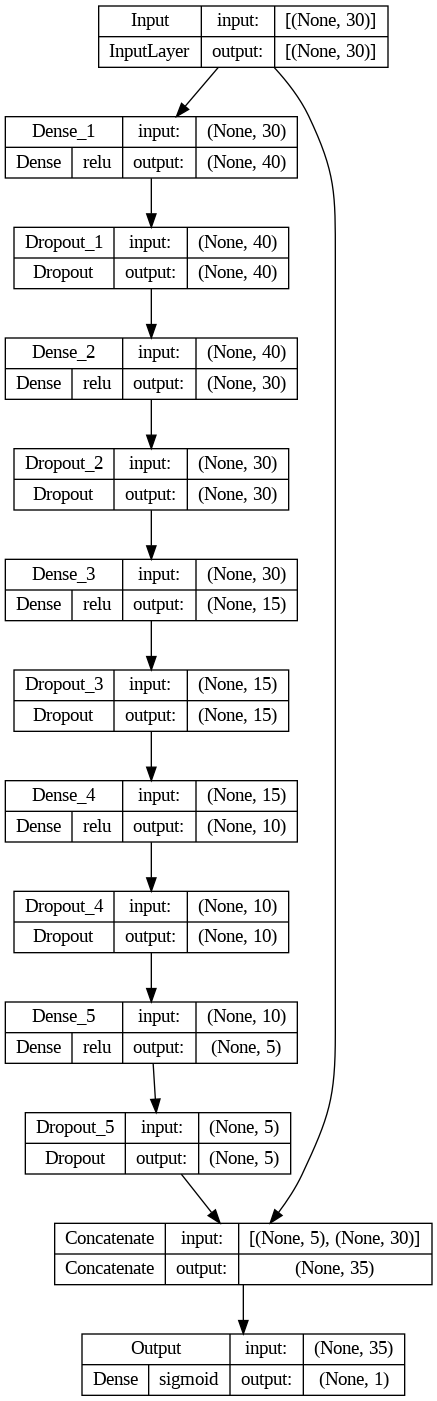

In [73]:
keras.utils.plot_model(model_functional, show_shapes=True, show_layer_activations=True, to_file='ans_functional_model.png')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از ساخت مدل آن را برای ۲۰۰ دور و با اندازه‌ی دسته (batch) معادل ۳۲ آموزش دهید. همچنین بُر زدن (shuffle) داده‌ها را فعال کنید. در صورت علاقه می‌توانید به کمک آرگومان <code>validation_split</code> از بخشی از داده‌های آموزشی برای اعتبارسنجی استفاده کنید (مقدار پیشنهادی <code>0.2</code> است).
<br>
پس از آموزش مدل، مقدار <code>loss</code> و <code>accuracy</code> را برای داده‌های آموزشی و آزمون محاسبه کرده و چاپ کنید.
</font>
</p>

In [74]:
history_functional = model_functional.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=200, shuffle=True)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 2s 24ms/step - loss: 2.9012 - accuracy: 0.3462 - val_loss: 2.9636 - val_accuracy: 0.2967
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 2.6766 - accuracy: 0.3791 - val_loss: 2.7072 - val_accuracy: 0.3407
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 2.5958 - accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 0s 7ms/step - loss: 2.4540 - accuracy: 0.4643 - val_loss: 2.4623 - val_accuracy: 0.4505
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 2.2488 - accuracy: 0.5467 - val_loss: 2.2203 - val_accuracy: 0.5714
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 2.0588 - accuracy: 0.6154 - val_loss: 2.0006 - val_accuracy: 0.6813
Epoch 6/200
12/12 [==============================] - 0s 7ms/step - loss: 1.9111 - accuracy: 0.6731 - val_loss: 1.8152 - val_accuracy: 0.7363
Epoch 7/200
12/12 [==============================] - 0s 8ms/step - loss: 1.7753 - accuracy: 0.6896 - val_loss: 1.6601 - val_accuracy: 0.7692
Epoch 8/200
12/12 [==============================] - 0s 7ms/step - loss: 1.6271 - accuracy: 0.7473 - val_loss: 1.5308 - val_accuracy: 0.7912
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 1.5277 - accuracy: 0.7720 - val_loss: 1.4206 - val_accuracy: 0.8242
Epoch 10/200
12/12 [=====

In [37]:
loss_functional, accuracy_functional = model_functional.evaluate(X_train, y_train, verbose = 0)
print(f"Train Loss: {loss_functional:.4f}, Train Accuracy: {accuracy_functional:.4f}")

loss_functional_test, accuracy_functional_test = model_functional.evaluate(X_test, y_test, verbose = 0)
print(f"Test Loss: {loss_functional_test:.4f}, Test Accuracy: {accuracy_functional_test:.4f}")

Train Loss: 0.1560, Train Accuracy: 0.9780
Test Loss: 0.1467, Test Accuracy: 0.9825


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">ارزیابی مدل‌ها به همراه رسم نمودار</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بررسی دقت عملکرد مدل‌هایی که ساخته‌اید، <code>confusion matrix</code> را رسم کنید. در ادامه نمودارهای <code>accuracy</code> بر اساس <code>epoch</code> و <code>loss</code> بر حسب <code>epoch</code> را نیز رسم کنید.
<br>
سلول‌های زیر جهت شفاف‌تر شدن و یکسان شدن تحلیل نتایج می‌باشد و فقط نام متغیرها را برای درست اجرا شدن تغییر دهید. دقت کنید که برای هر دو مدل باید اقدامات گفته شده را صورت دهید.
</font>
</p>

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

15/15 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9890
Train Loss: 0.1788, Train Accuracy: 0.9890


In [77]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.9649
Test Loss: 0.1993, Test Accuracy: 0.9649


In [78]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


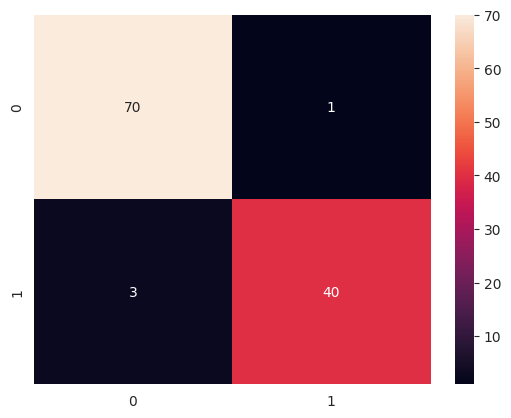

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_sequential.png')

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 40)                1240      
                                                                 
 Dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 Dense_2 (Dense)             (None, 30)                1230      
                                                                 
 Dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 Dense_3 (Dense)             (None, 15)                465       
                                                                 
 Dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 Dense_4 (Dense)             (None, 10)               

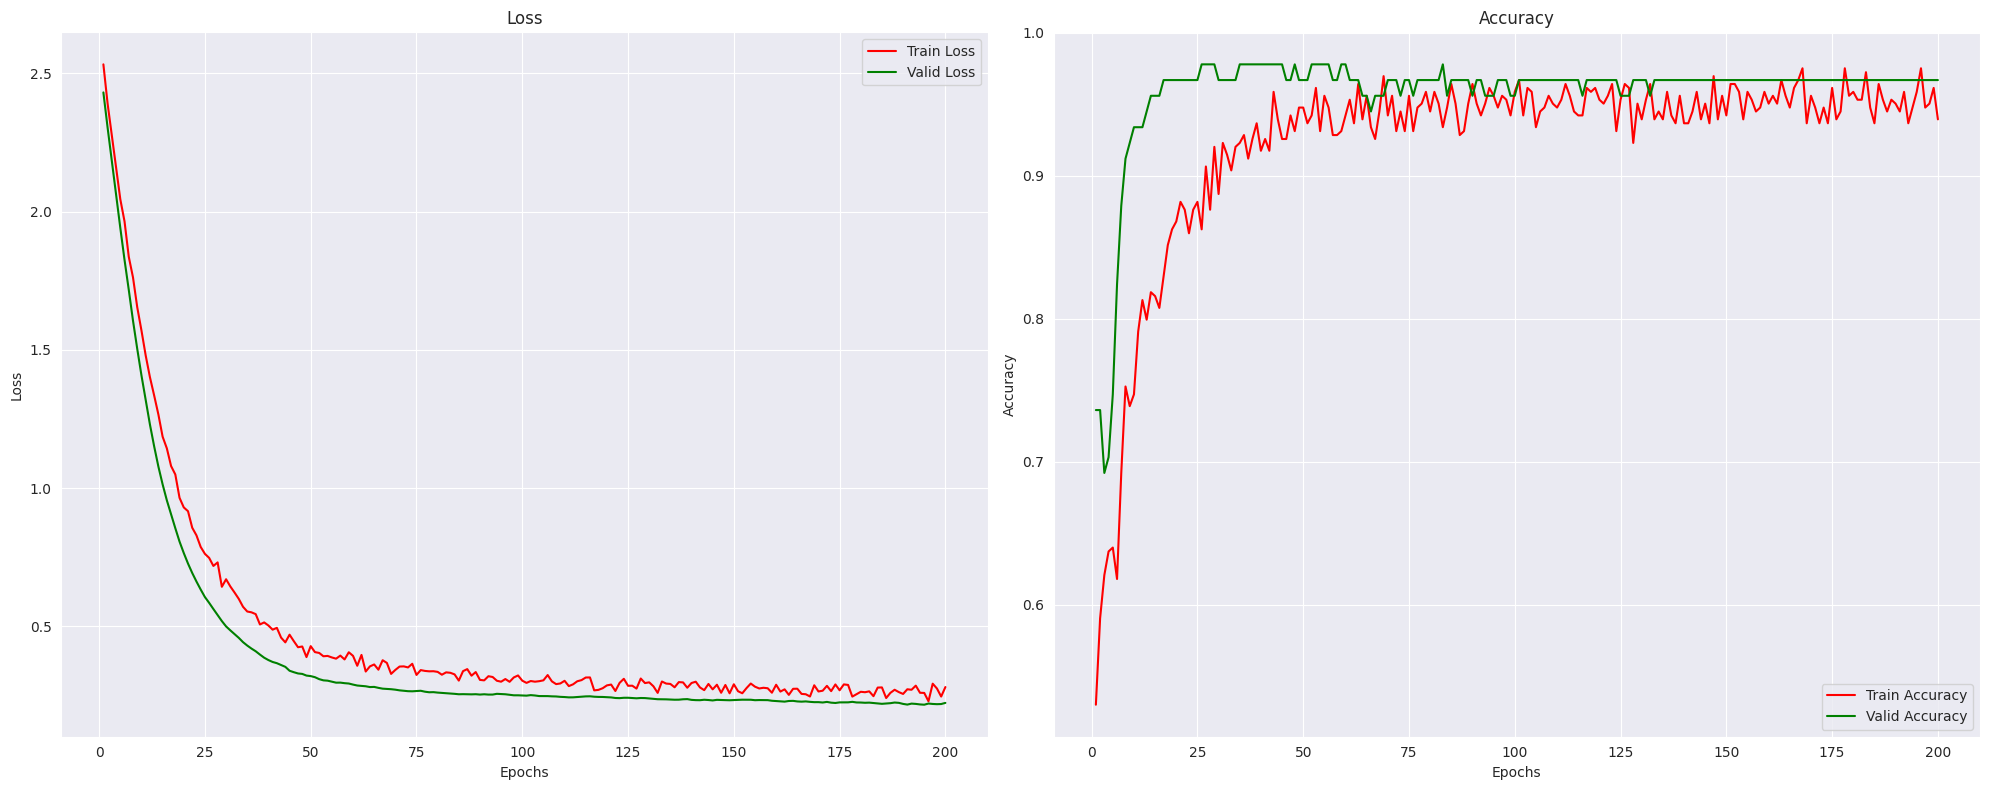

In [82]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# To-Do (Do the same for Functional API model)

In [83]:
loss, accuracy = model_functional.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

15/15 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9802
Train Loss: 0.1690, Train Accuracy: 0.9802


In [84]:
loss, accuracy =model_functional.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 5ms/step - loss: 0.1698 - accuracy: 0.9737
Test Loss: 0.1698, Test Accuracy: 0.9737


In [85]:
y_pred = model_functional.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 4ms/step


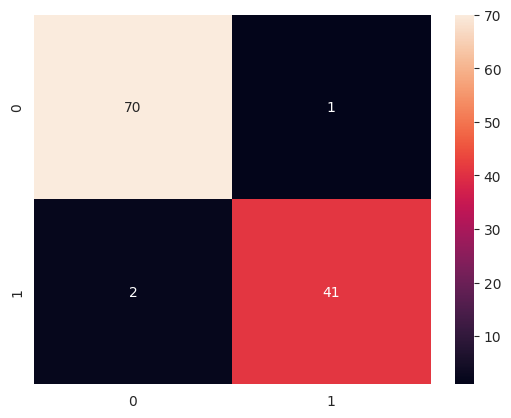

In [86]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_functional.png')

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [88]:
model_functional.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 30)]                 0         []                            
                                                                                                  
 Dense_1 (Dense)             (None, 40)                   1240      ['Input[0][0]']               
                                                                                                  
 Dropout_1 (Dropout)         (None, 40)                   0         ['Dense_1[0][0]']             
                                                                                                  
 Dense_2 (Dense)             (None, 30)                   1230      ['Dropout_1[0][0]']           
                                                                                            

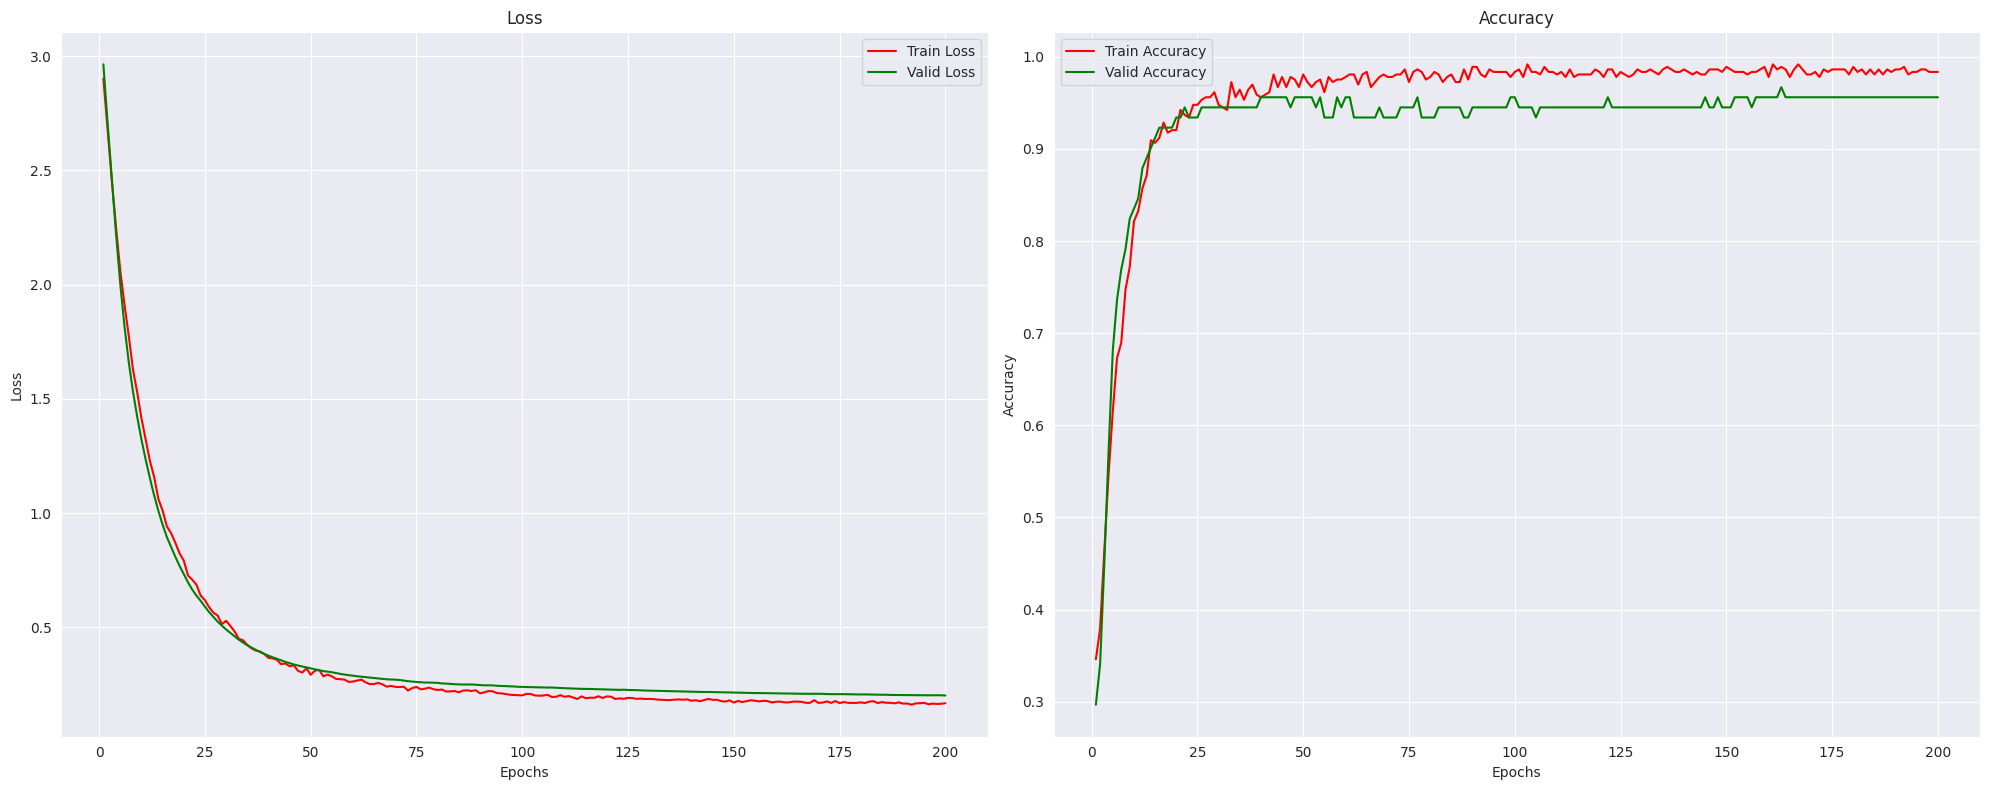

In [89]:
tr_acc = history_functional .history['accuracy']
tr_loss = history_functional .history['loss']
val_acc =history_functional .history['val_accuracy']
val_loss =history_functional .history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()